<a href="https://colab.research.google.com/github/BangkitCapstone-HELPER/ML-path/blob/main/extract_string_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip saved_model
!unzip "/content/drive/MyDrive/Capstone/ML/Model/ver6/ckpt faster rcnn inception v2 3/saved_model (4).zip"

Archive:  /content/drive/MyDrive/Capstone/ML/Model/ver6/ckpt faster rcnn inception v2 3/saved_model (4).zip
   creating: content/models/research/fine_tuned_model/saved_model/
   creating: content/models/research/fine_tuned_model/saved_model/variables/
  inflating: content/models/research/fine_tuned_model/saved_model/saved_model.pb  


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 74341, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 74341 (delta 177), reused 305 (delta 140), pack-reused 73980
Receiving objects: 100% (74341/74341), 580.28 MiB | 31.99 MiB/s, done.
Resolving deltas: 100% (52670/52670), done.


In [ ]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.3 MB 7.6 MB/s 
     |████████████████████████████████| 352 kB 46.6 MB/s 
     |████████████████████████████████| 2.1 MB 53.1 MB/s 
     |████████████████████████████████| 25.9 MB 76.0 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 4.6 MB 42.0 MB/s 
     |████████████████████████████████| 5

In [ ]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2022-06-08 00:57:46--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py’

inferenceutils.py   100%[===================>]   2.17K  --.-KB/s    in 0s      

2022-06-08 00:57:46 (35.4 MB/s) - ‘inferenceutils.py’ saved [2219/2219]



In [ ]:
output_dir = '/content/content/models/research/fine_tuned_model'
labelmap_path = "/content/drive/MyDrive/Capstone/ML/Img/scripts/labelmap.pbtxt"

category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'{output_dir}/saved_model')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


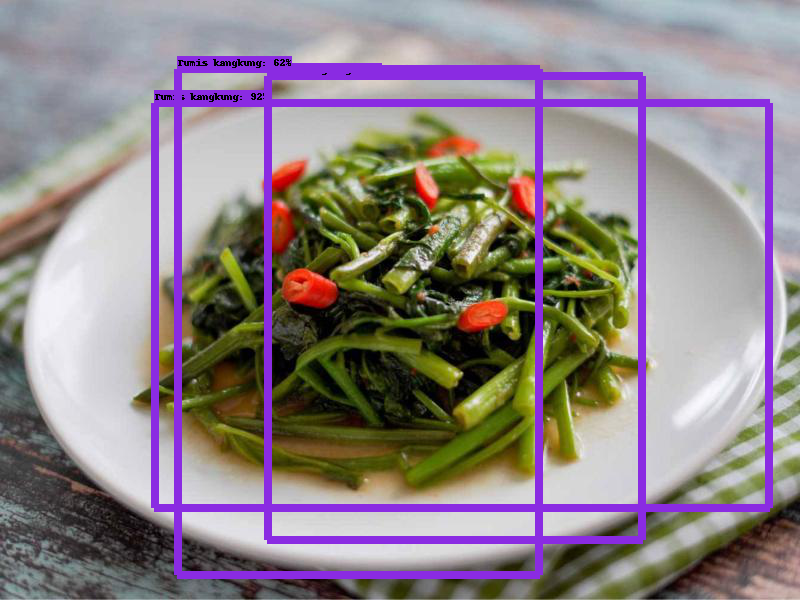

In [ ]:
image_name = '/content/drive/MyDrive/Capstone/ML/Img/test/tumis_kangkung-150_jpg.rf.a469780abbc009f2f3712ce70926d82d.jpg'
  
image_np = load_image_into_numpy_array(image_name)
output_dict = run_inference_for_single_image(model, image_np)
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
display(Image.fromarray(image_np))

In [ ]:
threshold = 0.5
food_predict = []
for i in range(len(output_dict['detection_scores'])):
  if output_dict['detection_scores'][i] > threshold:
    label = output_dict['detection_classes'][i]
    name = category_index[label]
    if name not in food_predict:
      food_predict.append(name)
print(food_predict)

[{'id': 8, 'name': 'Tumis kangkung'}]
